# **Logistic Regression (Multiclass) Using Scikit-Learn**

In this session we are going to study the following using scikit-learn:\
1 : Unregularised logistic regression \
 2:  Regularised logistic regression (L1 and L2)

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet.

In [ ]:
from sklearn.datasets import load_iris  #importing the load_iris class
iris_data = load_iris() #loading the iris dataset in iris_data

print(iris_data['DESCR']) #checking out the description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X = iris_data['data'][:,:2]
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

From the description, it is clear that *iris* dataset consists of essentially 3 classes: *Iris-Setosa*, *Iris-Versicolour*, *Iris-Virginica*.

In [ ]:
y = iris_data['target']
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1) #stratify is added so that the class proportions are same in both train and test splits
print('Size of training set:', len(X_train))
n = len(X_train)
print('Size of testing set:', len(X_test))
print('y train:')
print(y_train)
print('y test:')
print(y_test)
print('Label proportions in train data:')
print('class 0:',sum(y_train==0), 'class 1:', sum(y_train==1), 'class 2:', sum(y_train==2) ) #check label proportions in test data
print('Label proportions in test data:')
print('class 0:',sum(y_test==0), 'class 1:', sum(y_test==1), 'class 2:', sum(y_test==2) ) #check label proportions in train data

Size of training set: 120
Size of testing set: 30
y train:
[0 0 2 1 1 1 1 2 2 1 2 0 1 1 2 0 2 1 1 0 0 2 2 1 2 2 0 0 2 0 0 0 0 2 0 1 2
 1 2 2 1 1 2 2 1 1 2 1 1 0 2 0 2 0 0 1 0 1 2 0 2 0 0 2 2 0 1 0 0 1 2 1 1 0
 0 1 2 1 1 2 1 2 0 1 2 1 1 0 0 2 1 2 1 0 1 2 2 0 0 2 2 0 2 1 1 1 2 0 2 1 2
 0 2 0 1 0 1 0 0 0]
y test:
[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]
Label proportions in train data:
class 0: 40 class 1: 40 class 2: 40
Label proportions in test data:
class 0: 10 class 1: 10 class 2: 10


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report,confusion_matrix

# **Implement unregularised logistic Regression**

## Creating an object for class LogisticRegression and then using it to fit on the training data

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Printing the model parameters obtained from logistic regression

In [ ]:
print('intercept:')
print(logreg.intercept_)

print('coefficients:')
print(logreg.coef_)


intercept:
[  8.92928569   2.1914623  -11.12074799]
coefficients:
[[-2.69703334  2.01961608]
 [ 0.46324026 -1.39384528]
 [ 2.23379308 -0.6257708 ]]


#Note:
As we can see, there are three intercepts, corresponding to the three classes.
Also for each of the three classes, there are 2-dimensional vectors corresponding to the 2 features.

Thus for class 1, the parameters are $\boldsymbol{\beta}_1 = [\beta_{11}, \beta_{12}, \beta_{10}]$ = $[-2.69703334 \quad  2.01961608 \quad 8.92928569 ]$.

For class 2, the parameters are $\boldsymbol{\beta}_2 = [\beta_{21}, \beta_{22}, \beta_{20}]$ = $[0.46324026 \quad -1.39384528 \quad 2.1914623 ]$.

For class 3, the parameters are $\boldsymbol{\beta}_3 = [\beta_{31}, \beta_{32}, \beta_{30}]$ = $[2.23379308 \quad -0.6257708 \quad -11.12074799 ]$.



## Use the trained model parameters to predict on test data features

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [ ]:
print('Classification report on test data: ')
print(classification_report(y_test, logreg.predict(X_test),labels=[0,1,2]))

Classification report on test data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.60      0.60      0.60        10
           2       0.60      0.60      0.60        10

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30



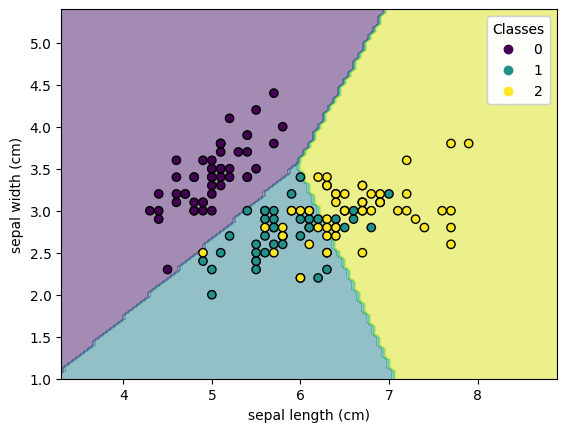

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# Create DecisionBoundaryDisplay object
disp = DecisionBoundaryDisplay.from_estimator(
    logreg, X, response_method="predict",
    xlabel=iris_data.feature_names[0], ylabel=iris_data.feature_names[1],
    alpha=0.5,
)

# Scatter plot the data points with their respective classes and labels
scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", label=iris_data.target_names)

# Add legend
legend1 = disp.ax_.legend(*scatter.legend_elements(), title="Classes", loc="best")
disp.ax_.add_artist(legend1)

# Show the plot
plt.show()

# **Implement $\ell_2$ regularised Logistic Regression**

In [ ]:
# Split Dataset into train and test dataset using sklearn
from sklearn.model_selection import train_test_split
X_train_initial, X_test, y_train_initial, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2000) #stratify is added so that the class proportions are same in both train and test splits
print('Size of training set:', len(X_train))
n = len(X_train_initial)
print('Size of testing set:', len(X_test))
print('y train:')
print(y_train_initial)
print('y test:')
print(y_test)
print('Label proportions in train data:')
print('class 0:',sum(y_train_initial==0), 'class 1:', sum(y_train_initial==1), 'class 2:', sum(y_train_initial==2) ) #check label proportions in test data
print('Label proportions in test data:')
print('class 0:',sum(y_test==0), 'class 1:', sum(y_test==1), 'class 2:', sum(y_test==2) ) #check label proportions in train data

Size of training set: 120
Size of testing set: 30
y train:
[0 0 0 1 2 1 0 1 0 1 2 0 0 2 0 2 2 1 1 2 1 0 1 1 2 0 0 1 0 0 2 1 2 2 0 0 0
 1 2 2 0 1 2 0 2 2 1 1 1 2 0 0 1 1 2 0 2 0 2 2 0 0 1 0 2 1 2 2 2 0 2 1 2 1
 2 1 1 0 2 1 1 0 2 2 0 0 1 1 1 0 0 2 1 1 0 2 1 1 2 1 0 0 0 1 1 2 0 2 0 1 1
 2 2 0 2 2 0 1 2 1]
y test:
[2 2 2 2 1 2 1 0 0 1 0 2 1 1 1 0 2 1 0 0 0 0 0 0 2 1 1 2 2 1]
Label proportions in train data:
class 0: 40 class 1: 40 class 2: 40
Label proportions in test data:
class 0: 10 class 1: 10 class 2: 10


#Perform 10-fold cross-validation

In [ ]:
pipeline = make_pipeline(LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=1))
#
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e5]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train_initial, y=y_train_initial,
                                             cv=10,
param_name='logisticregression__C', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

train scores: [[0.73148148 0.33333333 0.33333333 0.68518519 0.7037037  0.67592593
  0.33333333 0.71296296 0.68518519 0.66666667]
 [0.72222222 0.69444444 0.71296296 0.7037037  0.7037037  0.68518519
  0.67592593 0.7037037  0.69444444 0.68518519]
 [0.72222222 0.69444444 0.71296296 0.7037037  0.7037037  0.68518519
  0.67592593 0.7037037  0.69444444 0.67592593]
 [0.77777778 0.74074074 0.73148148 0.75       0.73148148 0.73148148
  0.72222222 0.75       0.73148148 0.73148148]
 [0.81481481 0.7962963  0.81481481 0.80555556 0.80555556 0.7962963
  0.80555556 0.80555556 0.81481481 0.77777778]
 [0.82407407 0.7962963  0.82407407 0.82407407 0.81481481 0.80555556
  0.82407407 0.82407407 0.83333333 0.80555556]
 [0.83333333 0.81481481 0.81481481 0.83333333 0.81481481 0.80555556
  0.83333333 0.83333333 0.80555556 0.80555556]
 [0.84259259 0.80555556 0.80555556 0.83333333 0.81481481 0.7962963
  0.83333333 0.83333333 0.80555556 0.7962963 ]
 [0.83333333 0.80555556 0.80555556 0.83333333 0.81481481 0.7962963
 

In [ ]:
#print(train_scores.shape)
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.58611111 0.69814815 0.69722222 0.73981481 0.8037037  0.81759259
 0.81944444 0.81666667 0.81481481 0.81481481 0.81481481]
average val scores : [0.58333333 0.7        0.7        0.74166667 0.78333333 0.80833333
 0.80833333 0.78333333 0.79166667 0.79166667 0.79166667]


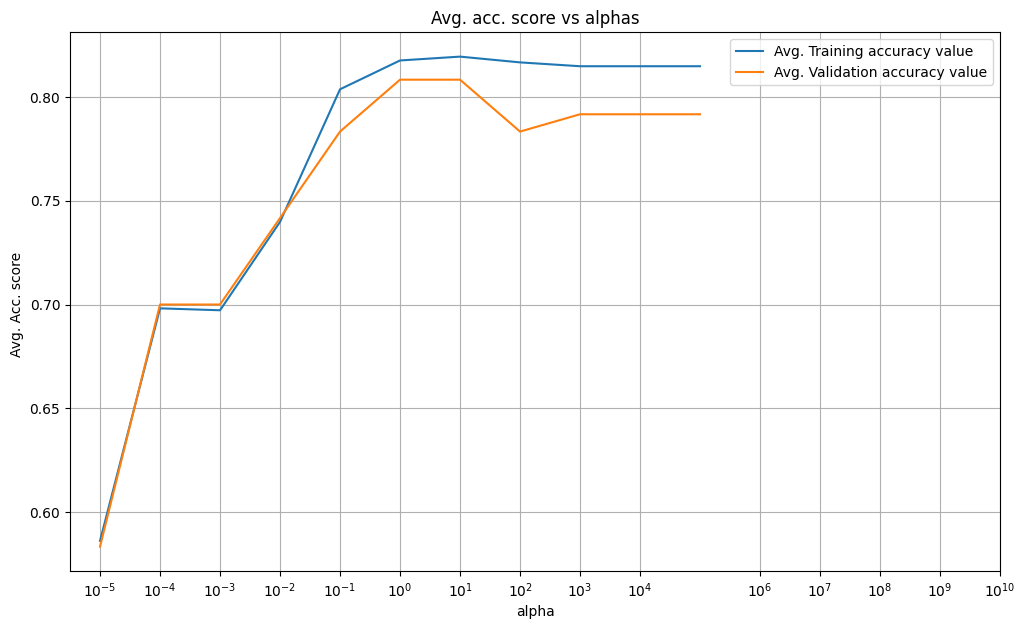

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Avg. Training accuracy value")
plt.plot(param_range, avg_val_scores,label = "Avg. Validation accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. Acc. score ')
plt.title("Avg. acc. score vs alphas")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()



In [ ]:
#best alpha
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best alpha from 10 fold CV:',best_alpha)

best alpha from 10 fold CV: 1


#**Taking best alpha and training on full train data**

In [ ]:
clf = LogisticRegression(solver='lbfgs', penalty='l2', C = best_alpha, max_iter=10000, random_state=1)
clf.fit(X_train_initial, y_train_initial)
for k in np.unique(y):
  print('class:',k, 'coefficients:', clf.coef_[k], 'intercept:', clf.intercept_[k])

class: 0 coefficients: [-2.5354631   2.12258621] intercept: 7.56172041929024
class: 1 coefficients: [ 0.57587499 -1.38739257] intercept: 1.4636891183968561
class: 2 coefficients: [ 1.95958811 -0.73519363] intercept: -9.025409537687018


# **Evaluating the performance on full train and test data**

---



In [ ]:
train_score = clf.score(X_train_initial, y_train_initial)
test_score = clf.score(X_test, y_test)
print('Train accuracy:',train_score)
print('Test accuracy:',test_score)

Train accuracy: 0.8166666666666667
Test accuracy: 0.8333333333333334


In [ ]:
print('Classification report on test data: ')
print(classification_report(y_test, clf.predict(X_test),labels=[0, 1,2]))

Classification report on test data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      0.70      0.74        10
           2       0.73      0.80      0.76        10

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



# **Implement L1 regularized Logistic Regression**

In [ ]:
pipeline = make_pipeline(LogisticRegression(solver='saga', penalty='l1', max_iter=10000, random_state=1))
#
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e5]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train_initial, y=y_train_initial,
                                             cv=10,
param_name='logisticregression__C', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)
print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

train scores: [[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
  0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
  0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
  0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
  0.33333333 0.33333333 0.33333333 0.33333333]
 [0.76851852 0.74074074 0.76851852 0.75925926 0.75       0.75
  0.75       0.75925926 0.76851852 0.74074074]
 [0.83333333 0.80555556 0.80555556 0.82407407 0.80555556 0.7962963
  0.82407407 0.83333333 0.80555556 0.78703704]
 [0.83333333 0.80555556 0.80555556 0.83333333 0.80555556 0.7962963
  0.83333333 0.83333333 0.80555556 0.7962963 ]
 [0.82407407 0.7962963  0.7962963  0.82407407 0.80555556 0.78703704
  0.81481481 0.83333333 0.7962963  0.78703704]
 [0.82407407 0.7962963  0.7962963  0.82407407 0.80555556 0.78703704
  0.81

In [ ]:
#print(train_scores.shape)
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.33333333 0.33333333 0.33333333 0.33333333 0.75555556 0.81203704
 0.81481481 0.80648148 0.80648148 0.80648148 0.80648148]
average val scores : [0.33333333 0.33333333 0.33333333 0.33333333 0.75       0.79166667
 0.78333333 0.78333333 0.78333333 0.78333333 0.78333333]


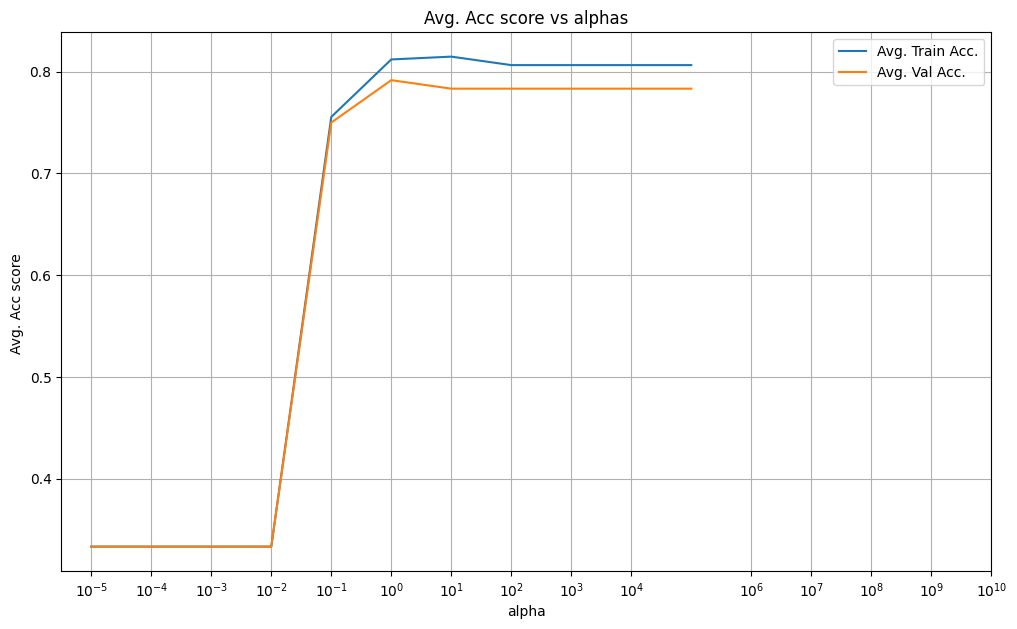

In [ ]:
plt.figure(figsize =(12,7))
plt.plot(param_range,avg_train_scores,label = "Avg. Train Acc.")
plt.plot(param_range, avg_val_scores,label = "Avg. Val Acc.")
plt.xlabel('alpha')
plt.ylabel('Avg. Acc score ')
plt.title("Avg. Acc score vs alphas")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()

In [ ]:
#best alpha
best_alpha = param_range[np.argmax(avg_val_scores)]
print('best alpha from 10 fold CV:',best_alpha)

best alpha from 10 fold CV: 1


#**Training on full data**

In [ ]:
clf = LogisticRegression(solver='saga', penalty='l1', C=best_alpha, max_iter=10000, random_state=1)
clf.fit(X_train_initial, y_train_initial)
for k in np.unique(y):
  print('class:',k, 'coefficients:', clf.coef_[k], 'intercept:',clf.intercept_[k])

class: 0 coefficients: [-4.1796399   4.87185854] intercept: 8.045006606428034
class: 1 coefficients: [ 0.         -0.19635525] intercept: 1.0773453241051787
class: 2 coefficients: [1.54601271 0.        ] intercept: -9.122351930533673


# **Evaluating the performance on full train data and test data**

---


In [ ]:
train_score = clf.score(X_train_initial, y_train_initial)
test_score = clf.score(X_test, y_test)
print('Train accuracy:',train_score)
print('Test accuracy:',test_score)

Train accuracy: 0.8166666666666667
Test accuracy: 0.8666666666666667


In [ ]:
print('Classification report on test data: ')
print(classification_report(y_test, clf.predict(X_test),labels=[0, 1,2]))

Classification report on test data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.70      0.78        10
           2       0.75      0.90      0.82        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



**Exercise :**

1. Plot the decision boundaries for l1 and l2 regularized logistic regression
2. In the decision boundary plots, try to plot the lines corresponding to the coefficient vectors $\boldsymbol{\beta}_1$, $\boldsymbol{\beta}_2$ and $\boldsymbol{\beta}_3$. Check the geometric orientation of the decision surfaces and the lines corresponding to parameter vectors. List your observations.